<a href="https://colab.research.google.com/github/Rahul711sharma/Seoul-Bike-Sharing-Demand-Prediction-WIP-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [271]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import*
import datetime as dt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode
%matplotlib inline

In [272]:
df = pd.read_csv("https://raw.githubusercontent.com/Rahul711sharma/Seoul-Bike-Sharing-Demand-Prediction-WIP-/main/SeoulBikeData.csv",encoding= 'unicode_escape',date_parser="Date")

# Exploratory Data analysis

In [273]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [274]:
df.shape

(8760, 14)

In [275]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,21/10/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [276]:
df.shape

(8760, 14)

In [277]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Extracting Features from ``Date``**

In [278]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month']= pd.DatetimeIndex(df['Date']).month
df['weekday']=pd.DatetimeIndex(df['Date']).weekday

In [279]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [280]:
display(df['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

``weekday`` is in range 0-6 so we need to make it in normal 1-7.

In [281]:
df['weekday'] = np.array(df['weekday'])+1
display(df['weekday'].unique())


array([4, 7, 3, 5, 1, 6, 2])

##**Demand of rented bikes at different times of years**

In [282]:
Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bike_per_Weekday

,weekday,Rented Bike Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [283]:
df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [284]:
df.groupby(['Year','Month']).agg({'Rented Bike Count':['sum']}).reset_index()

,Year,Month,Rented Bike Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [285]:
month_year_group= df.groupby(by=['Month','Year']).agg({'Rented Bike Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented Bike Count',x= 'Month',color= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=400)

* There's is a whooping increase in number of bike rents in year 2018. 
* But also, there is a decline in the end of the year. This could be repercussions of winter season.

In [286]:
px.bar(month_year_group,y= 'Rented Bike Count',x= 'Month',facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


In [287]:
day_year_group= df.groupby(by=['Day','Year']).agg({'Rented Bike Count':'sum'}).reset_index()

In [288]:
px.line(day_year_group,y= 'Rented Bike Count',x= 'Day',color= 'Year',title='Total Rented Bikes on daily basis in 2017 and 2018',width=800, height=400)

In [289]:
weekday_year_group= df.groupby(by=['weekday','Year']).agg({'Rented Bike Count':'sum'}).reset_index()
px.line(weekday_year_group,y= 'Rented Bike Count',x= 'weekday',color= 'Year',title='Total Rented Bikes on weekday basis in 2017 and 2018',width=800, height=400)

We can clearly conclude here that this business seems new in year 2017 and demand increases significantly in 2018

##**Categorical Feature Exploration**

In [290]:
Rented_bike_seasons= df.groupby(by=['Year','Seasons']).agg({'Rented Bike Count':'sum'}).reset_index()
px.bar(Rented_bike_seasons,y= 'Rented Bike Count',x= 'Seasons',facet_col='Year',title='Total Rented Bikes in diffrent Seasons in 2017 and 2018',width=800, height=500)

In [291]:
for i in df.columns:
  if i not in list(df.describe().columns)+['Date']:
    print(f"{i}:\n {df[i].value_counts()} \n")

Seasons:
 Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday:
 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning Day:
 Yes    8465
No      295
Name: Functioning Day, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Seasons')

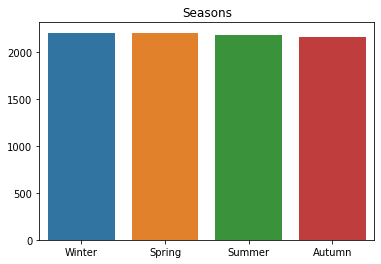

In [292]:
sns.barplot(df['Seasons'].unique(),list(pd.DataFrame(df['Seasons'].value_counts()).iloc[:,0]))
plt.title('Seasons')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Holiday')

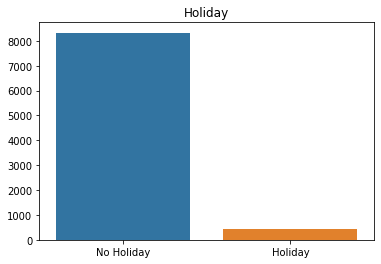

In [293]:
sns.barplot(df['Holiday'].unique(),list(pd.DataFrame(df['Holiday'].value_counts()).iloc[:,0]))
plt.title('Holiday')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Functioning Day')

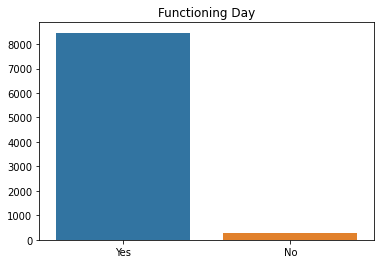

In [294]:
sns.barplot(df['Functioning Day'].unique(),list(pd.DataFrame(df['Functioning Day'].value_counts()).iloc[:,0]))
plt.title('Functioning Day')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



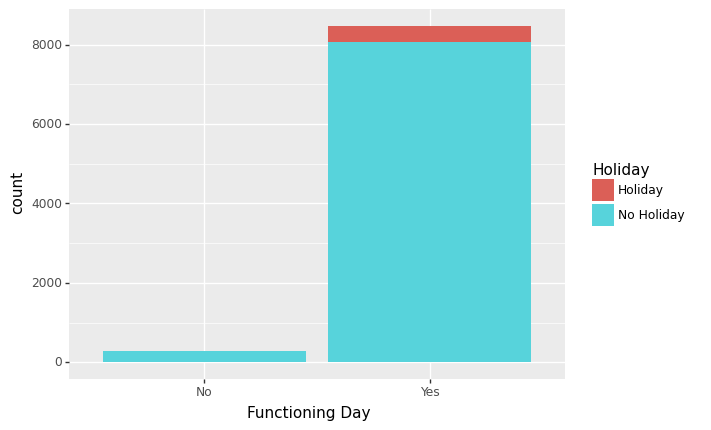

<ggplot: (8769892024713)>

In [295]:
ggplot(df)+ aes('Functioning Day',fill='Holiday')+geom_bar()

* Here's an ironic insight, all the holidays are falling on the functioning Days.


##Analysis of Numeric Variables

In [296]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Day,Month,weekday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,15.720548,6.526027,4.021918
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,8.796749,3.448048,1.999994
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,8.000000,4.000000,2.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,16.000000,7.000000,4.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,23.000000,10.000000,6.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,31.000000,12.000000,7.000000


In [297]:
px.histogram(df, x="Rented Bike Count",marginal="box",color='Year')

* Data is Positive skewed

In [298]:
px.histogram(df, x=np.sqrt(df["Rented Bike Count"]),
                   marginal="violin",color='Year',title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

**Correlation of number of rented bikes with other numeric variables**

In [299]:
px.scatter(df,'Hour','Rented Bike Count',trendline="ols",trendline_color_override='yellow')

In [300]:
for i in df.describe().columns:
  if i not in ['Rented Bike Count','Year','Day','Month','weekday','Hour']:
    display(px.scatter(df,i,'Rented Bike Count',trendline="ols",trendline_color_override='yellow',opacity=0.6,title=f"{i} and Rented Bike Count"),width=500,length=500)

* Number of bikes rented is most positively correlated to ``Temperature`` and ``Dew Point Temperature``.
*  Number of bikes rented is most negatively correlated ``Snowfall (cm)`` and ``Humidity``

**Label Encoding and one-hot encoding**

In [301]:
df = df.replace({'No':0,'Yes':1,'Holiday':1,'No Holiday':0})

In [302]:
season_dummy = pd.get_dummies(df['Seasons'])
for i in season_dummy.columns:
  df[i]= season_dummy[i]
df.drop('Seasons',axis='columns',inplace=True)
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,1


**Treatment of multi-colliearity**

In [303]:
#Correlation of Dependent Variable with independent Variables
np.round(df.corr()['Rented Bike Count'],3)

Rented Bike Count            1.000
Hour                         0.410
Temperature(°C)              0.539
Humidity(%)                 -0.200
Wind speed (m/s)             0.121
Visibility (10m)             0.199
Dew point temperature(°C)    0.380
Solar Radiation (MJ/m2)      0.262
Rainfall(mm)                -0.123
Snowfall (cm)               -0.142
Holiday                     -0.072
Functioning Day              0.204
Year                         0.215
Day                          0.047
Month                        0.071
weekday                     -0.022
Autumn                       0.103
Spring                       0.023
Summer                       0.297
Winter                      -0.425
Name: Rented Bike Count, dtype: float64

In [304]:
# Remove the possible noise Data that not required for model

df.drop('Date',axis=1,inplace=True)


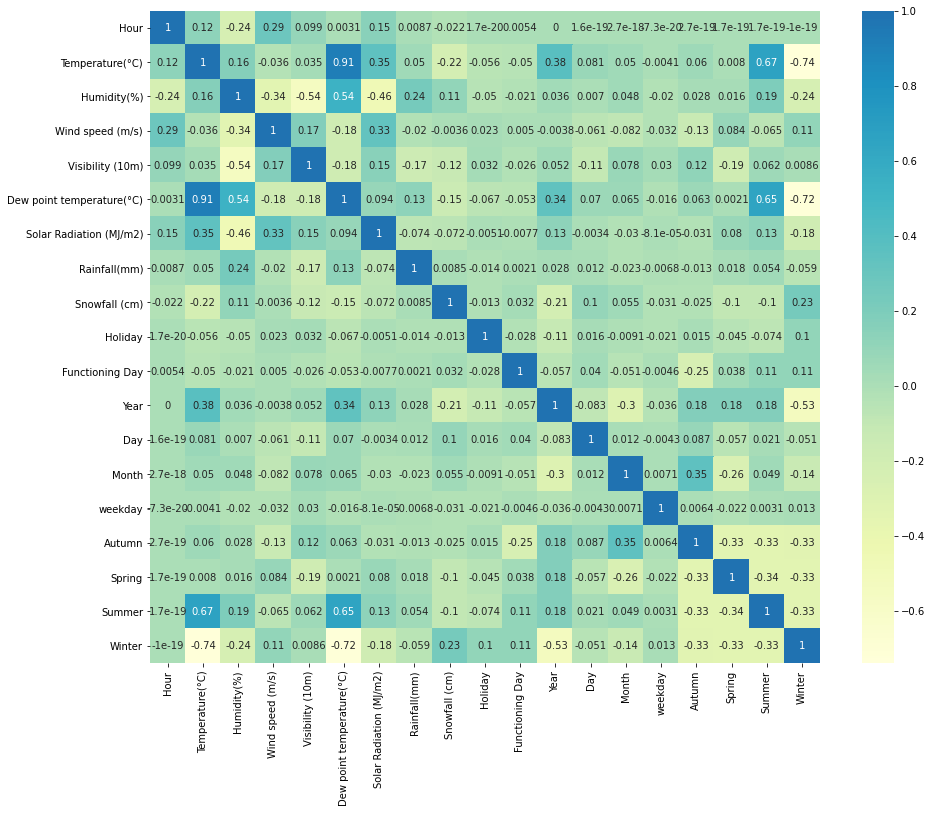

In [305]:
#checking multi-collinearity

plt.figure(figsize=(15,12))
sns.heatmap(df[df.describe().columns[1:]].corr(),annot=True,cmap="YlGnBu",center=0.5)

* Temperature and Dew point temperature are highly correlated. We can add them to make one single column


In [306]:
df['Temperature_and_DP_Temp'] = [df['Temperature(°C)'][i]+df['Dew point temperature(°C)'][i] for i in range(len(df))]
df.drop(['Temperature(°C)','Dew point temperature(°C)'],axis=1,inplace=True)

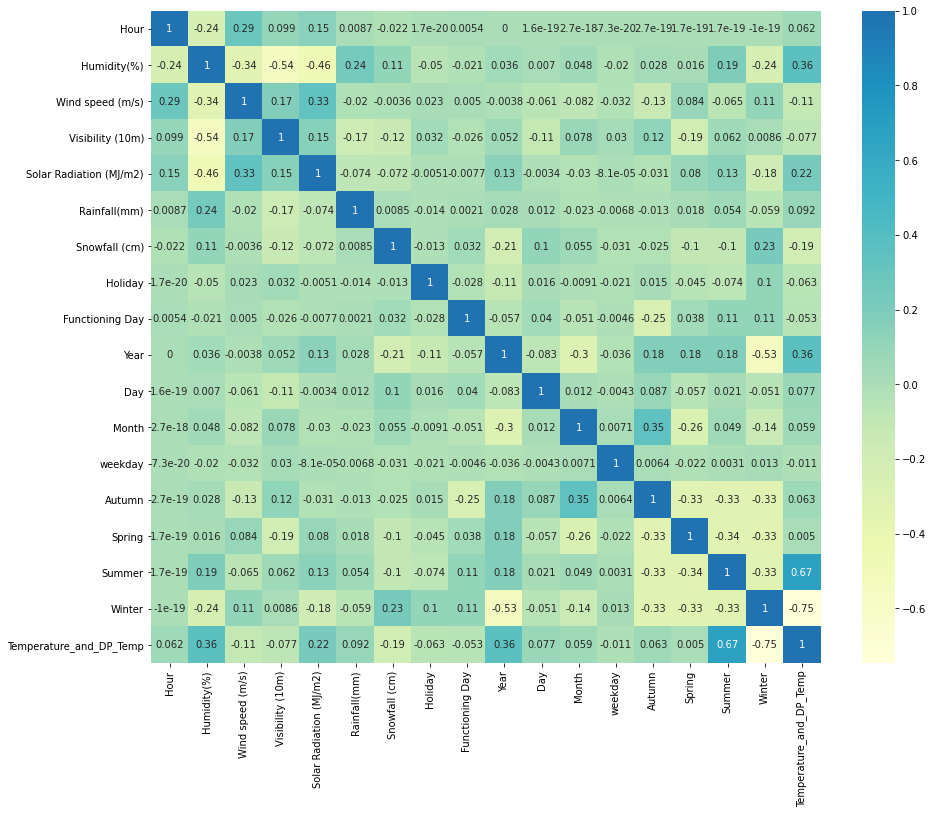

In [307]:
plt.figure(figsize=(15,12))
sns.heatmap(df[df.describe().columns[1:]].corr(),annot=True,cmap="YlGnBu",center=0.5)

In [309]:
#Correlation with Dependent Variable
np.round(df.corr()['Rented Bike Count'],3)

Rented Bike Count          1.000
Hour                       0.410
Humidity(%)               -0.200
Wind speed (m/s)           0.121
Visibility (10m)           0.199
Solar Radiation (MJ/m2)    0.262
Rainfall(mm)              -0.123
Snowfall (cm)             -0.142
Holiday                   -0.072
Functioning Day            0.204
Year                       0.215
Day                        0.047
Month                      0.071
weekday                   -0.022
Autumn                     0.103
Spring                     0.023
Summer                     0.297
Winter                    -0.425
Temperature_and_DP_Temp    0.466
Name: Rented Bike Count, dtype: float64

In [310]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [311]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','month']]])

,variables,VIF
0,Hour,1.208234e+00
1,Humidity(%),3.154455e+00
2,Wind speed (m/s),1.307612e+00
3,Visibility (10m),1.731487e+00
4,Solar Radiation (MJ/m2),1.921777e+00
5,Rainfall(mm),1.072672e+00
6,Snowfall (cm),1.142777e+00
7,Holiday,1.030469e+00
8,Functioning Day,1.086150e+00
9,Year,1.934574e+00


#Model Building

In [323]:
x = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']
x.head(3)

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,Autumn,Spring,Summer,Winter,Temperature_and_DP_Temp
0,0,37,2.2,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,1,-22.8
1,1,38,0.8,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,1,-23.1
2,2,39,1.0,2000,0.0,0.0,0.0,0,1,2017,12,1,4,0,0,0,1,-23.7


**Train Test split model**

In [330]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7008, 18)
(7008,)
(1752, 18)
(1752,)


##Linear Regression Model

In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as met

In [377]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=100000, normalize=True)

In [378]:
train_pred = linear_reg.predict(x_train)
linear_reg.score(x_train,y_train)

0.5532778665257989

In [379]:
met.r2_score(y_train,linear_reg.predict(x_train))

0.5532778665257989

In [335]:
met.r2_score(y_test,linear_reg.predict(x_test))


0.5470370255349117

* For Linear Regression our model is too general.
* We have to make our model more complex for better discretion.

#Decision Tree Regressor

In [341]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.
DT_reg = DecisionTreeRegressor(criterion='mse')
DT_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [338]:
DT_reg.score(x_train,y_train)

1.0

In [339]:
DT_reg.score(x_test,y_test)

0.8249605669038004